<a href="https://colab.research.google.com/github/shahchayan9/Dimensionality-Reduction/blob/main/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UMAP Explained

## What is UMAP?

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique used for visualizing high-dimensional data in lower dimensions (like 2D or 3D) while preserving the data's structure and relationships.

**Use Cases:**

* **Visualization:** Making complex datasets easier to understand by plotting them in a way that reveals clusters and patterns.
* **Clustering:** Helping to identify groups or clusters within the data based on their proximity in the reduced space.
* **Feature Engineering:** Creating new, lower-dimensional features that can be used as input for other machine learning models.

## How does it work?

1. **Manifold Learning:** UMAP assumes that high-dimensional data often lies on a lower-dimensional manifold (a shape or surface) within the high-dimensional space.
2. **Graph Representation:** It creates a graph representing the relationships between data points based on their distances in the high-dimensional space.
3. **Dimensionality Reduction:** It then optimizes a lower-dimensional representation of this graph, trying to preserve the distances and relationships between points as accurately as possible.

## Advantages of UMAP

* **Preserves Global Structure:** UMAP is often better than other techniques (like t-SNE) at preserving the overall structure of the data in the lower-dimensional representation.
* **Scalability:** It's relatively fast and can handle larger datasets than some other methods.
* **Non-linear Relationships:** It can capture complex, non-linear relationships between data points.

## In the context of your Colab notebook:

You're using UMAP to visualize the digits dataset. The code is reducing the high-dimensional features of the digits (pixel values) into two dimensions, making it possible to see how different digits cluster together visually.

## Key Parameters

* **`n_neighbors`:** Controls the size of the local neighborhood considered when building the graph. A larger value focuses on the global structure, while a smaller value emphasizes local structure.
* **`min_dist`:** Controls how close points can be in the low-dimensional representation. A smaller value allows points to be packed more tightly together.
* **`n_components`:** The number of dimensions to reduce the data to (usually 2 or 3 for visualization).

In [ ]:
!pip install umap-learn  >/dev/null

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap # Import umap from umap-learn
import seaborn as sns

In [ ]:
# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Apply normal PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled) # Fit and transform the scaled data

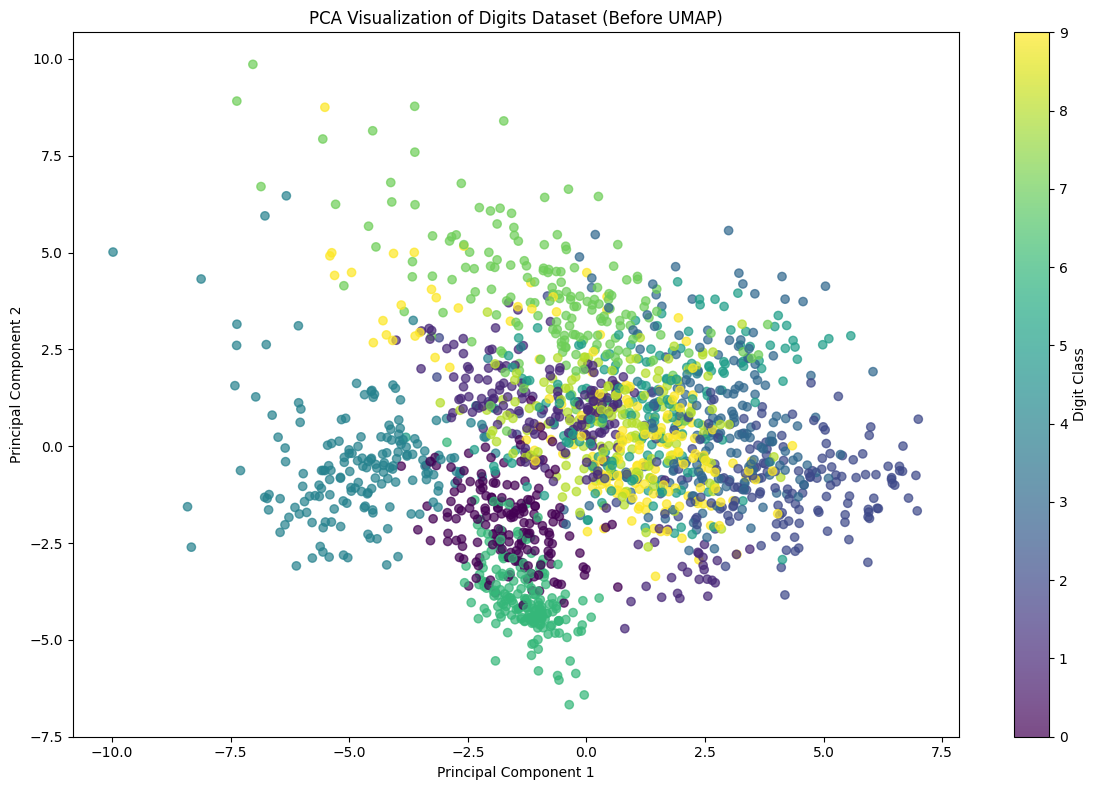

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Digit Class')
plt.title('PCA Visualization of Digits Dataset (Before UMAP)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [ ]:
# Perform UMAP dimensionality reduction
# You can adjust these parameters to see different results
reducer = umap.UMAP(
    n_neighbors=15,  # Size of local neighborhood
    min_dist=0.1,    # Minimum distance between points in low dimensional representation
    n_components=2,  # Number of dimensions to reduce to
    random_state=42  # For reproducibility
)
X_umap = reducer.fit_transform(X_scaled)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


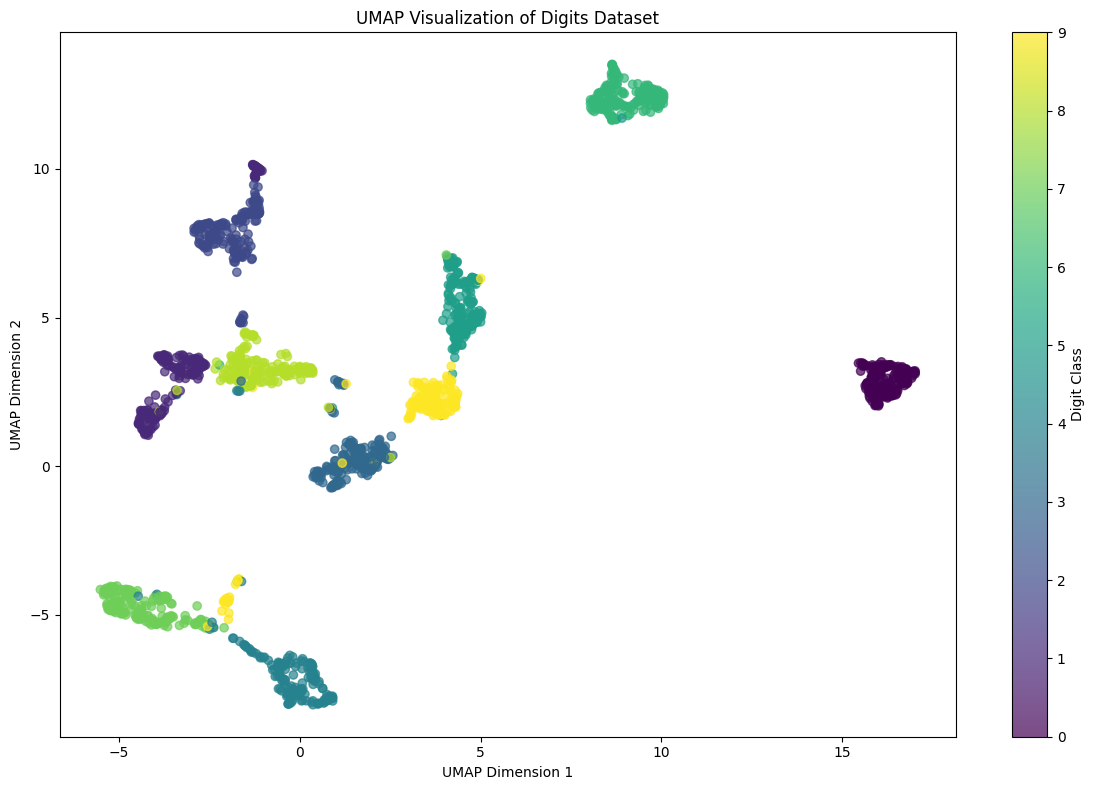

In [ ]:
# Create a visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    X_umap[:, 0],
    X_umap[:, 1],
    c=y,
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Digit Class')
plt.title('UMAP Visualization of Digits Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.tight_layout()
plt.show()

In [ ]:
# Print some additional information
print("Original data shape:", X.shape)
print("Reduced data shape:", X_umap.shape)


Original data shape: (1797, 64)
Reduced data shape: (1797, 2)


In [ ]:
# Demonstrate the variance preservation
print("\nVariance Preservation:")
original_variance = np.var(X_scaled, axis=0).sum()
umap_variance = np.var(X_umap, axis=0).sum()
print(f"Original data variance: {original_variance:.4f}")
print(f"UMAP reduced data variance: {umap_variance:.4f}")
print(f"Variance preservation ratio: {umap_variance/original_variance:.4f}")


Variance Preservation:
Original data variance: 61.0000
UMAP reduced data variance: 66.5912
Variance preservation ratio: 1.0917
